In [120]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import nltk
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.metrics import auc as skl_auc
from nltk import word_tokenize, sent_tokenize
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/christiandungca/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [121]:
# Load nlp data
df = pd.read_csv('data/data.csv')

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  223 non-null    object
 1   fulltext  218 non-null    object
dtypes: object(2)
memory usage: 3.6+ KB


In [123]:
df.head()

,category,fulltext
0,accountability,United Nations A/60/846/Add.6 Gener...
1,accountability,United Nations A/64/640 General Ass...
2,accountability,United Nations A/71/729 General Asse...
3,accountability,United Nations A/72/492 General Asse...
4,accountability,United Nations A/72/492/Add.1 Genera...


In [124]:
df["category"].value_counts()

category
travel                  76
human resources         72
accountability          50
health and wellbeing    25
Name: count, dtype: int64

In [125]:
df.isnull().sum()

category    0
fulltext    5
dtype: int64

In [126]:
# drop rows with missing values
df = df.dropna()


In [127]:
df["category"].value_counts()

category
travel                  75
human resources         70
accountability          48
health and wellbeing    25
Name: count, dtype: int64

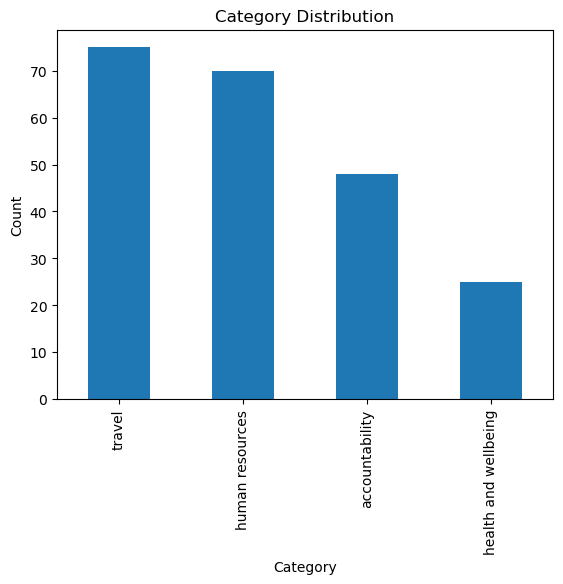

In [128]:
# category distribution
df['category'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Distribution')
plt.show()

In [129]:
# Health and Wellbeing only has 25 records compared to the other catgeories. To balance the data set and remove the bias, we will remove health and wellbeing records.
# Remove health and wellbeing records in df
df = df[df["category"] != "health and wellbeing"]

In [130]:
# Check category distribution
df["category"].value_counts()

category
travel             75
human resources    70
accountability     48
Name: count, dtype: int64

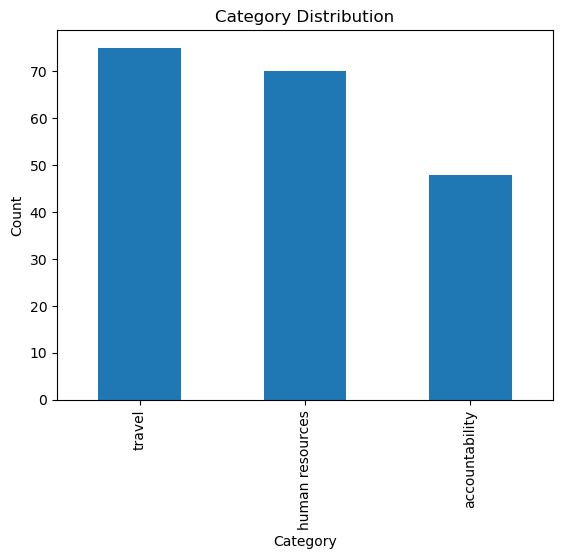

In [131]:
# category distribution
df['category'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Distribution')
plt.show()


In [132]:
# Start analysis and modeling
X = df.drop('category', axis = 1)
y = df['category']

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X['fulltext'], y, random_state = 42)

In [134]:
X_train.head()

155      United Nations    ST/AI/2011/9       Secreta...
31     United Nations ST/SGB/2002/7   Secretariat 16 ...
201      United Nations    ST/IC/2017/6      Secretar...
83       ____________________________________________...
78                     23-15066 (E)            Policy...
Name: fulltext, dtype: object

In [135]:
# Use CountVectorizer
cvect = ''
dtm = ''

cvect = CountVectorizer()
dtm = cvect.fit_transform(X_train)

pd.DataFrame(dtm.toarray(), columns = cvect.get_feature_names_out()).head()

,00,000,0001,00045,000s,001,002,003,004,005,...,zealand,zefat,zero,zimbabwe,zoe,zone,ztiug,zurab,zz,zzzz
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [136]:
cvect_pipe = ''

test_acc = ''

    

cvect_pipe = Pipeline([('cvect', CountVectorizer()),
                       ('lgr', LogisticRegression(max_iter=10000))])
cvect_pipe.fit(X_train, y_train)
test_acc = cvect_pipe.score(X_test, y_test)

cvect_pipe.named_steps


{'cvect': CountVectorizer(), 'lgr': LogisticRegression(max_iter=10000)}

In [137]:
params = {'cvect__max_features': [100, 500, 1000, 2000],
         'cvect__stop_words': ['english', None]}

In [139]:
grid = ''
test_acc = ''

grid = GridSearchCV(cvect_pipe, param_grid=params)
grid.fit(X_train, y_train)
test_acc = grid.score(X_test, y_test)

grid.best_params_

print(test_acc)

0.7142857142857143
